In [1]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,noise=0.03,random_state=42)

In [2]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [3]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

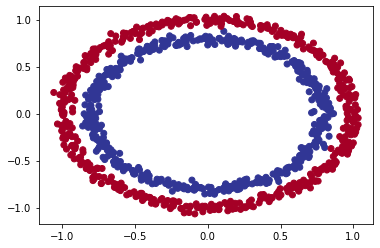

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

In [7]:
import numpy as np

def plot_decision_boundary(model, X, y):

  x_min, x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
  y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max,100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if model.output_shape[-1] > 1: 
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [8]:
X_train, y_train = X[:800], y[:800] 
X_test, y_test = X[800:], y[800:] 


X_train.shape, X_test.shape

((800, 2), (200, 2))

In [9]:
import tensorflow as tf

tf.random.set_seed(42)

model_lr_schedule = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lr_schedule.compile(loss= 'binary_crossentropy',
                optimizer= 'Adam',
                metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_lr_schedule.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6888 - accuracy: 0.5150 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5113 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5113 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5125 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5138 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5150 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5163 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5175 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

Epoch 73/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5400 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7088 - accuracy: 0.4888 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7014 - accuracy: 0.4963 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7028 - accuracy: 0.4963 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7066 - accuracy: 0.4988 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7116 - accuracy: 0.5063 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7105 - accuracy: 0.5213 - lr: 0.7943
Epoch 80/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7022 - accuracy: 0.4963 - lr: 0.8913
Epoch 81/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7105 - accuracy: 0.5

In [10]:
model_lr_schedule.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4950


[0.6933718919754028, 0.4950000047683716]

<AxesSubplot:xlabel='Epochs'>

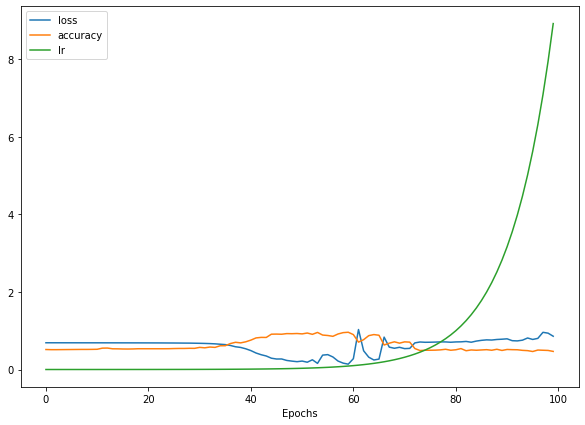

In [11]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel='Epochs')

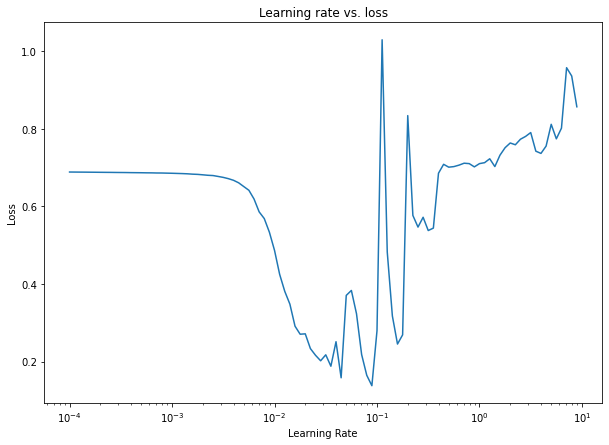

In [12]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) 
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [13]:
tf.random.set_seed(42)

model_definedLR = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_definedLR.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), 
                metrics=["accuracy"])

history = model_definedLR.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.7170 - accuracy: 0.5013
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.7112 - accuracy: 0.4988
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.7076 - accuracy: 0.4888
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.7047 - accuracy: 0.4825
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.7029 - accuracy: 0.4225
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.7016 - accuracy: 0.3988
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.4625
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.4725
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4712
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.4725
Epoch 11/20
25/25 [

<AxesSubplot:xlabel='Epochs'>

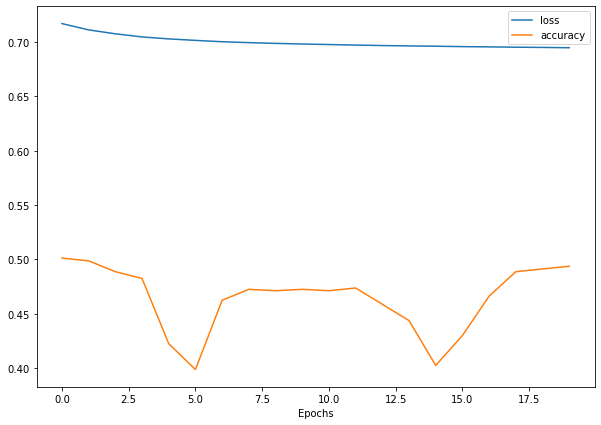

In [14]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel='Epochs')

In [15]:
model_definedLR.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4750


[0.6958170533180237, 0.4749999940395355]

In [16]:
from sklearn.metrics import confusion_matrix

y_preds = model_definedLR.predict(X_test)

confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 1ms/step


array([[89, 12],
       [93,  6]], dtype=int64)